In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/FIFA%2023%20Player%20Research/Fifa_23_Players_Data.csv")
data.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [5]:
data.shape

(17529, 89)

In [6]:
data.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [7]:
data.isna().any().sum()

0

In [8]:
data.columns = [i.replace(' ', '_') for i in data.columns]

In [9]:
data.head()

,Known_As,Full_Name,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Image_Link,Age,...,LM_Rating,CM_Rating,RM_Rating,LWB_Rating,CDM_Rating,RWB_Rating,LB_Rating,CB_Rating,RB_Rating,GK_Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [10]:
data = data.drop(columns = ['Full_Name', 'Image_Link', 'National_Team_Image_Link', 'National_Team_Jersey_Number', 
                            'TotalStats', 'BaseStats', 'Release_Clause', 'Club_Position', 'Club_Jersey_Number'
                           , 'Weak_Foot_Rating', 'Skill_Moves', 'International_Reputation', 
                           'National_Team_Position', 'Attacking_Work_Rate', 'Defensive_Work_Rate'])

In [11]:
data = data.drop(columns = data.select_dtypes('int64').loc[:,"Pace_Total":"GK_Rating"])

In [12]:
data['On_Loan'] = data['On_Loan'].str.replace("-","0").replace("TRUE",1)

In [13]:
data.shape

(17529, 17)

In [14]:
data.columns

Index(['Known_As', 'Overall', 'Potential', 'Value(in_Euro)',
       'Positions_Played', 'Best_Position', 'Nationality', 'Age',
       'Height(in_cm)', 'Weight(in_kg)', 'Club_Name', 'Wage(in_Euro)',
       'Contract_Until', 'Joined_On', 'On_Loan', 'Preferred_Foot',
       'National_Team_Name'],
      dtype='object')

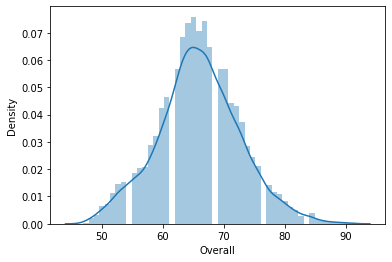

In [15]:
sns.distplot(data.Overall);

In [16]:
data[data.Overall == 91]

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,On_Loan,Preferred_Foot,National_Team_Name
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,0,Left,Argentina
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,0,Right,France
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,0,Right,Poland
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,0,Right,Belgium
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,0,Right,France


In [17]:
data[data["Value(in_Euro)"] == max(data["Value(in_Euro)"])]

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,On_Loan,Preferred_Foot,National_Team_Name
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,0,Right,France


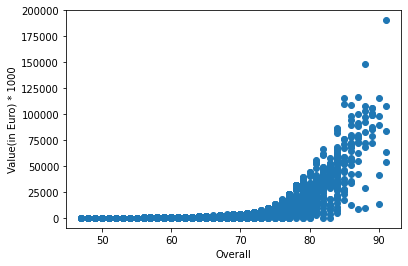

In [18]:
plt.scatter(y = data['Value(in_Euro)']/1000, x = data['Overall'])
plt.xlabel('Overall')
plt.ylabel('Value(in Euro) * 1000');

In [19]:
x = data.Nationality.values
y = data.Nationality.value_counts()
y

England                1494
Germany                1188
Spain                  1026
France                  922
Argentina               871
                       ... 
São Tomé e Príncipe       1
Bermuda                   1
Korea DPR                 1
Liechtenstein             1
Singapore                 1
Name: Nationality, Length: 159, dtype: int64

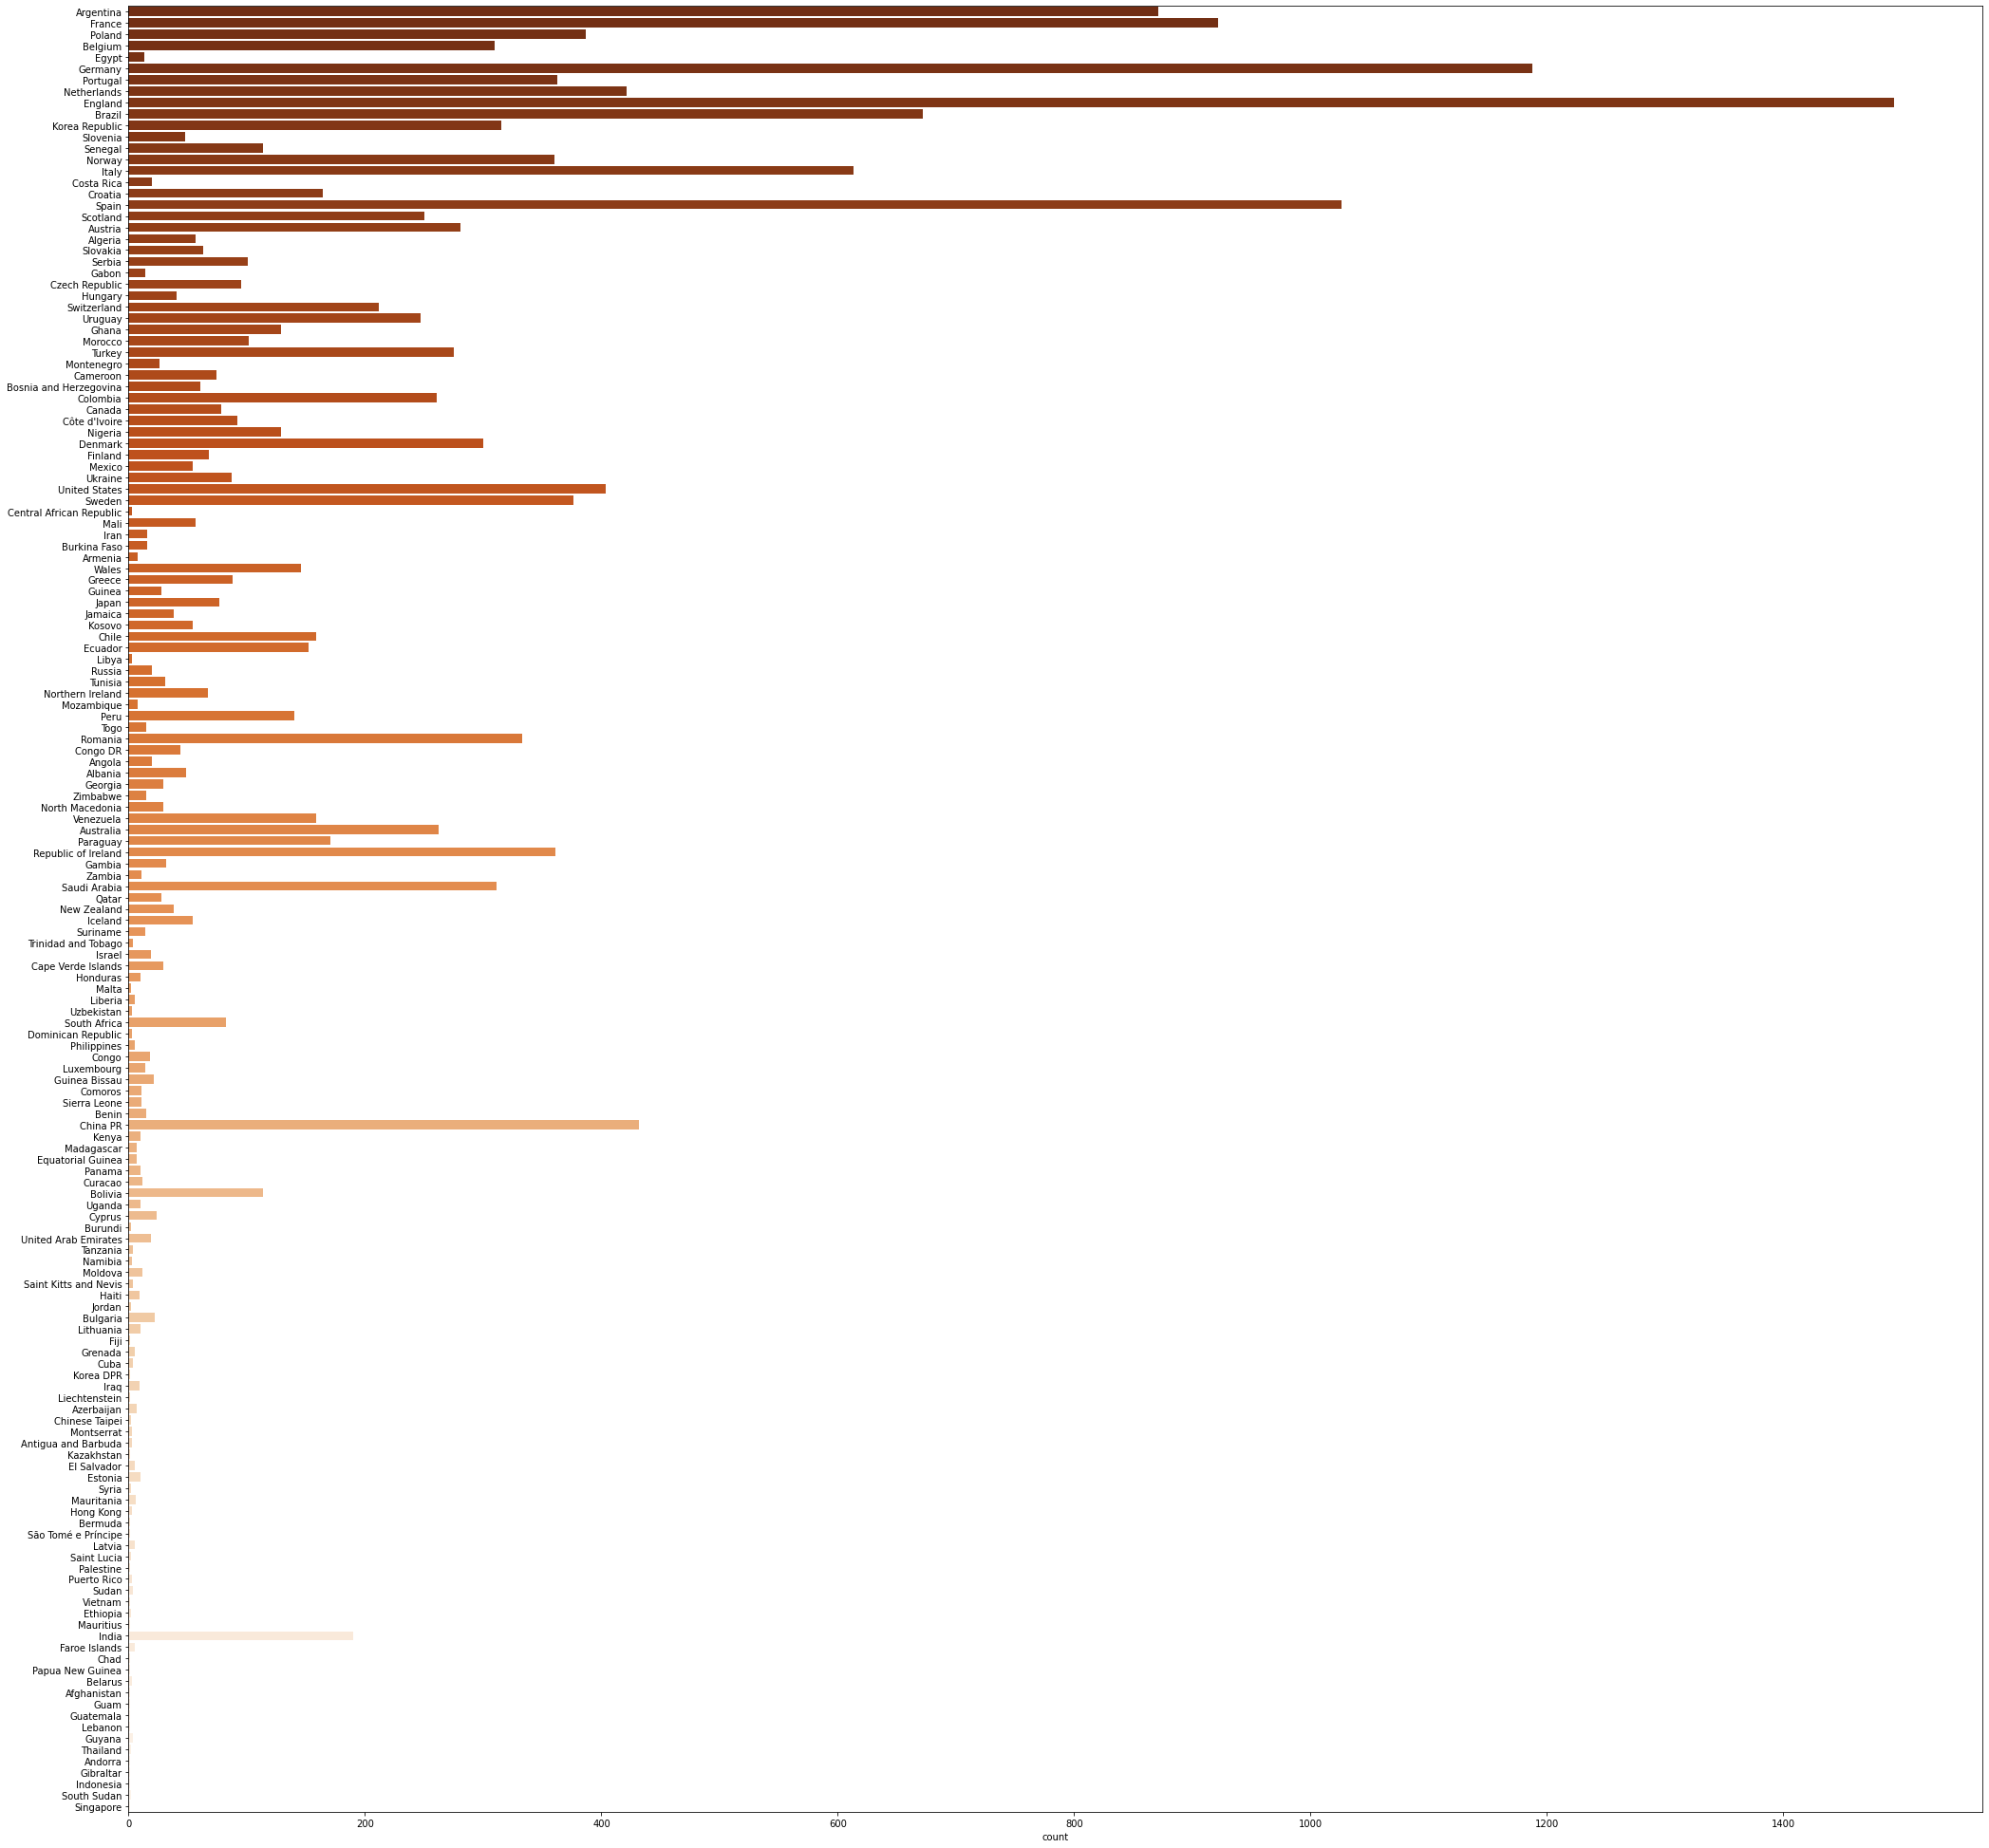

In [20]:
plt.figure(figsize = (35, 35))
sns.countplot(y = x, palette = 'Oranges_r');

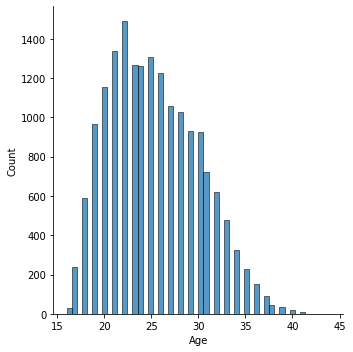

In [21]:
sns.displot(data.Age);

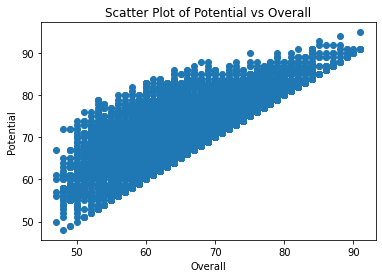

In [22]:
plt.scatter(x = data['Overall'], y = data['Potential'])
plt.xlabel('Overall')
plt.ylabel('Potential')
plt.title('Scatter Plot of Potential vs Overall');

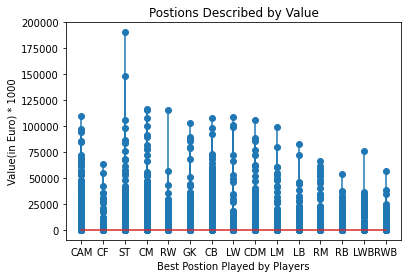

In [23]:
x = data['Best_Position']
y = data['Value(in_Euro)']/1000
plt.stem(x, y, use_line_collection = True)
plt.xlabel('Best Postion Played by Players')
plt.ylabel('Value(in Euro) * 1000')
plt.title('Postions Described by Value');

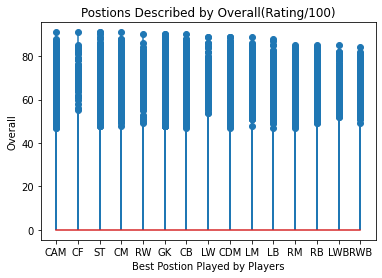

In [24]:
x = data['Best_Position']
y = data['Overall']
plt.stem(x, y, use_line_collection = True)
plt.xlabel('Best Postion Played by Players')
plt.ylabel('Overall')
plt.title('Postions Described by Overall(Rating/100)');

In [25]:
data["Overall"].max()

91

In [26]:
data.head()

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,On_Loan,Preferred_Foot,National_Team_Name
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,0,Left,Argentina
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,0,Right,France
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,0,Right,Poland
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,0,Right,Belgium
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,0,Right,France


In [27]:
Preferred_Foot = pd.get_dummies(data['Preferred_Foot'])
Preferred_Foot.head()

,Left,Right
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
new_data = pd.concat([data, Preferred_Foot], axis = 1)
new_data = new_data.drop('Preferred_Foot', axis = 1)
new_data.head()

,Known_As,Overall,Potential,Value(in_Euro),Positions_Played,Best_Position,Nationality,Age,Height(in_cm),Weight(in_kg),Club_Name,Wage(in_Euro),Contract_Until,Joined_On,On_Loan,National_Team_Name,Left,Right
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,Paris Saint-Germain,195000,2023,2021,0,Argentina,1,0
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,Real Madrid CF,450000,2023,2009,0,France,0,1
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,FC Barcelona,420000,2025,2022,0,Poland,0,1
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,Manchester City,350000,2025,2015,0,Belgium,0,1
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,Paris Saint-Germain,230000,2024,2018,0,France,0,1


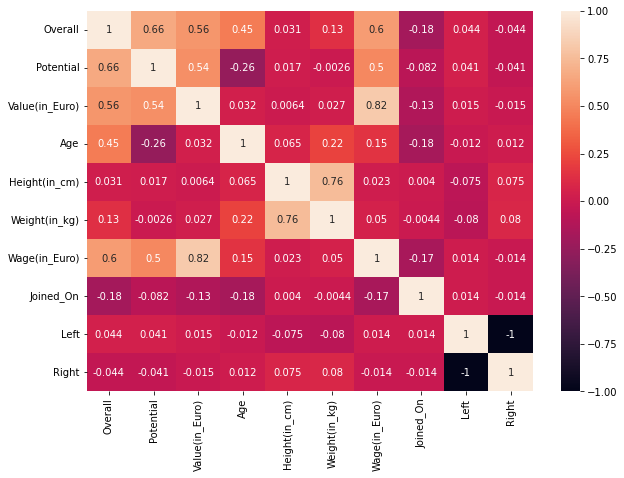

In [32]:
plt.figure(figsize = (10, 7))
corr = new_data.corr()
sns.heatmap(corr, annot = True);

In [33]:
x = new_data.drop(['Known_As', 'Positions_Played', 'Contract_Until', 'Best_Position', 'Nationality', 'Club_Name','National_Team_Name'], axis = 1)
y = new_data['Value(in_Euro)']
df_train, df_test = train_test_split(x, test_size = 0.2, random_state = 101)
y_train = df_train.pop('Value(in_Euro)')
x_train = df_train

y_test = df_test.pop('Value(in_Euro)')
x_test = df_test

In [34]:
len(x_train.columns)

10

In [35]:
rge = DecisionTreeRegressor(max_depth = 8)
rge.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [41]:
rge = DecisionTreeRegressor(max_depth = 6)
rge.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)